# --> Pipelines

## Model Training without using Pipelines

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer

In [73]:
df = pd.read_csv('dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [77]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [78]:
# Applying imputation

si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [79]:
# scaler on age
scaler = MinMaxScaler()
train_age_scaled = scaler.fit_transform(X_train_age)  
test_age_scaled = scaler.transform(X_test_age)    

In [ ]:
X_train_embarked

In [81]:
# one hot encoding Sex and Embarked

ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [82]:
X_train_embarked

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [83]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [84]:
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])

In [85]:
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [86]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [87]:
X_train_transformed

array([[1., 0., 0., ..., 0., 0., 1.],
       [2., 0., 0., ..., 0., 0., 1.],
       [3., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 2., 0., ..., 0., 0., 1.],
       [1., 1., 2., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [105]:
X_test_transformed.shape

(179, 10)

In [106]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [108]:
y_pred = clf.predict(X_test_transformed)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1])

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.770949720670391

In [110]:
import pickle

In [111]:
pickle.dump(ohe_sex,open('models/ohe_sex.pkl','wb'))
pickle.dump(ohe_embarked,open('models/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('models/clf.pkl','wb'))

### Predict without pipeline (Big nuisance for deployment)

In [112]:
ohe_sex = pickle.load(open('models/ohe_sex.pkl','rb'))
ohe_embarked = pickle.load(open('models/ohe_embarked.pkl','rb'))
clf = pickle.load(open('models/clf.pkl','rb'))

In [113]:
# Assume user input
# Pclass/gender/age/SibSp/Parch/Fare/Embarked
test_input = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [114]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [115]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))


E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [116]:
test_input_sex

array([[0., 1.]])

In [117]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))

In [118]:
test_input_embarked

array([[0., 0., 1.]])

In [119]:
test_input_age = test_input[:,2].reshape(1,1)

In [120]:
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

In [121]:
test_input_transformed.shape

(1, 10)

In [122]:
clf.predict(test_input_transformed)

array([1])

## Model Training using Pipeline

In [125]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [126]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [127]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [128]:
y_train.sample(5)

369    1
501    0
140    0
725    0
435    1
Name: Survived, dtype: int64

In [132]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')


In [133]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [134]:

# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])


In [135]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [136]:
# train the model
trf5 = DecisionTreeClassifier()

In [137]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [138]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [139]:
# train
pipe.fit(X_train,y_train)

,steps,"[('columntransformer-1', ...), ('columntransformer-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_age', ...), ('impute_embarked', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Explore Pipe

In [140]:
# Code here
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'columntransformer-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'columntransformer-3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'selectkbest': SelectKBest(k=8, score_func=<function chi2 at 0x000001C4853F97E0>),
 'decisiontreeclassifier': DecisionTreeClassifier()}

In [141]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [142]:
# Predict
y_pred = pipe.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [145]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.6391214419383433)

### Hyperparameter tuning

In [ ]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [146]:
# export 
import pickle
pickle.dump(pipe,open('models/pipe.pkl','wb'))

### Predict using pipeline

In [147]:
import pickle
import numpy as np

In [149]:
pipe = pickle.load(open('models/pipe.pkl','rb'))

In [150]:
# Assume user input
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [151]:
pipe.predict(test_input2)

E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])

## Mathematical Transformations in Machine Learning

Mathematical transformations are used to modify the distribution or scale of features to make them more suitable for machine learning models. They are especially helpful when features are **skewed**, have **outliers**, or do **not follow a normal distribution**.

###  Why Use Mathematical Transformations?

- Normalize skewed data
- Stabilize variance (homoscedasticity)
- Handle outliers
- Improve model convergence and performance
- Meet assumptions of certain models (e.g., linear models)



### 🔹 1. Function Transformations

Apply basic mathematical functions to compress or stretch the data.

| Transformation | Formula            | Use Case                                  |
|----------------|--------------------|--------------------------------------------|
| **Log**        | `log(x + 1)`       | For right-skewed distributions             |
| **Reciprocal** | `1 / (x + ε)`      | For heavy-tailed distributions             |
| **Square**     | `x²`               | To amplify large values (left-skewed data) |
| **Square Root**| `√x`               | Reduces right skewness                     |
| **Exponential**| `e^x`              | For left-skewed distributions              |

> ℹ️ Note: Always handle zero or negative values carefully when applying log or reciprocal transforms.



### 🔹 2. Power Transformations

Power transformations stabilize variance and make data more Gaussian (normal-like).

#### a. Box-Cox Transform
- Only works for **positive** values.
- Learns an optimal λ (lambda) value to apply power transform.
- Formula varies based on λ:
  - If λ ≠ 0: `(x^λ - 1)/λ`
  - If λ = 0: `log(x)`

#### b. Yeo-Johnson Transform
- Extension of Box-Cox that handles **both positive and negative** values.
- Suitable when data has mixed signs.

🛠️ Commonly used via:
```python
from sklearn.preprocessing import PowerTransformer
PowerTransformer(method='yeo-johnson')  # or 'box-cox'
```



### 🔹 3. Quantile Transformation

Maps the original feature distribution to a uniform or normal distribution using quantiles.

- Makes features more Gaussian-like regardless of original distribution
- Handles **extreme outliers** effectively
- Non-linear, so may reduce correlation with target in some cases

🛠️ Example:
```python
from sklearn.preprocessing import QuantileTransformer
QuantileTransformer(output_distribution='normal')
```



### 📌 Summary Table

| Transformation Type | Handles Negatives | Handles Outliers | Normalizes Distribution | Model Friendly |
|---------------------|-------------------|------------------|--------------------------|----------------|
| Function Transform  | ❌ (some)          | ⚠️ Limited        | ⚠️ Sometimes              | ✅              |
| Power Transform     | ✅ (Yeo-Johnson)   | ✅                | ✅                        | ✅✅             |
| Quantile Transform  | ✅                 | ✅✅               | ✅✅                       | ⚠️ Depends      |



> ✅ Use these transformations wisely based on your dataset's distribution and the model you're training. Always visualize your features before and after applying them.


## Function Tranformation

In [5]:
df = pd.read_csv('dataset/train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

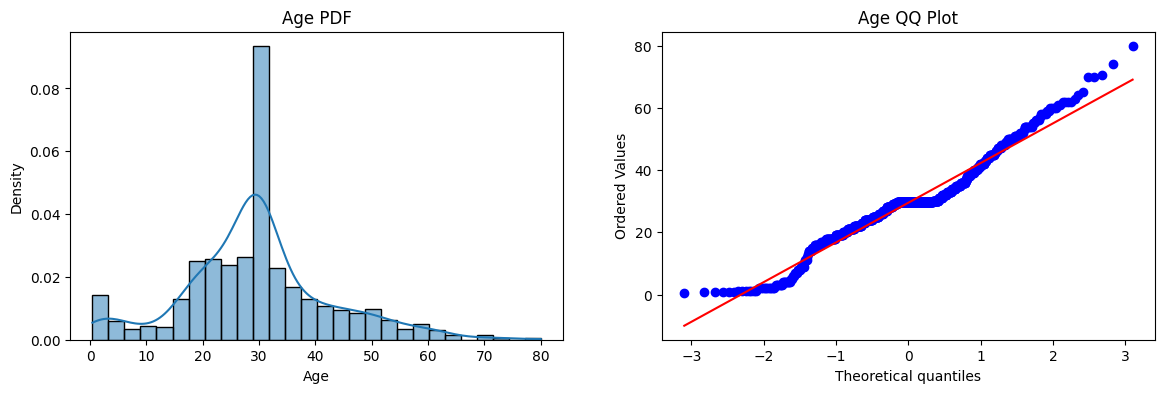

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Age'],kde=True,stat='density')
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

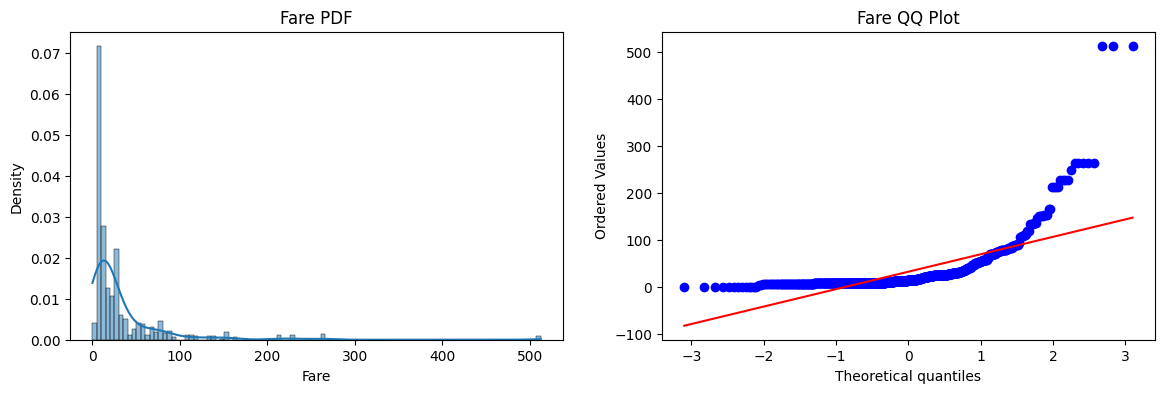

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True,stat='density')
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

#### Accuracy without Function Transformation

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [33]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


#### Accuracy with Function transformation

In [35]:
trf = FunctionTransformer(func=np.log1p)

In [36]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [38]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610861423220973


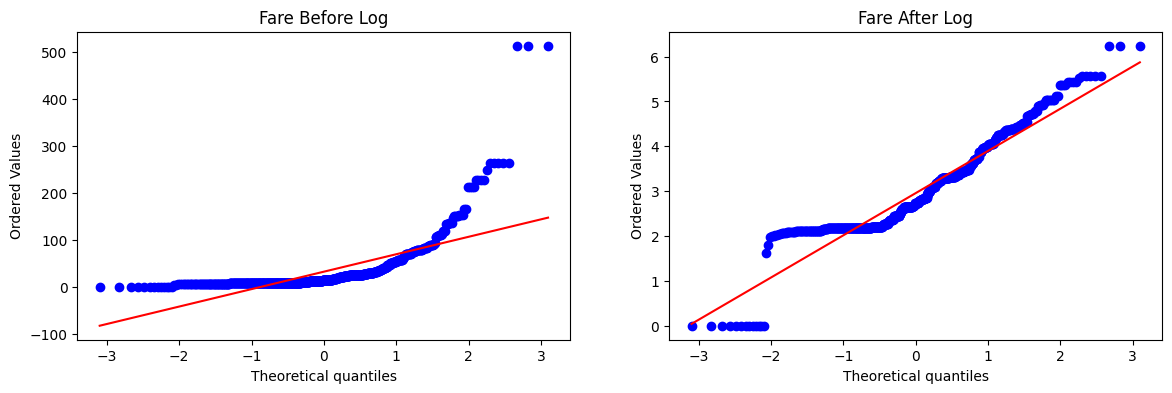

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

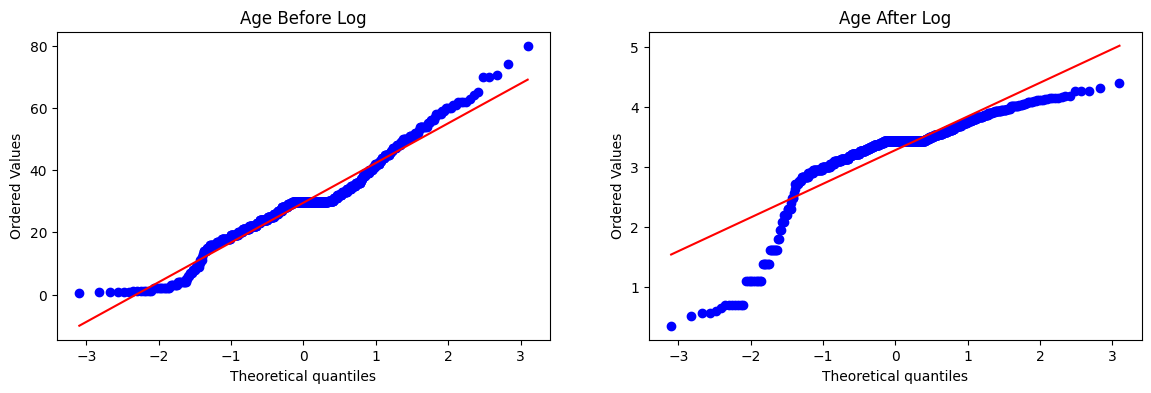

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [42]:
# log only on fare
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


#### Cross validation

In [44]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6667041198501872


#### General function to run and check any custom function

In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


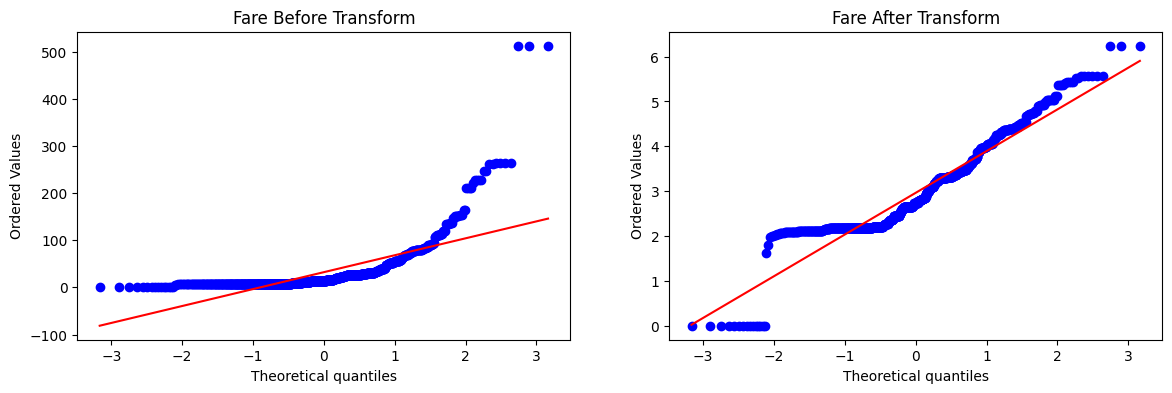

In [57]:
apply_transform(lambda x:np.log1p(x))

## Power Tranformation

### 1. Without any transformation

In [5]:
df = pd.read_csv('dataset/concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [17]:
# Cross checking with cross val score
lr = LinearRegression()
cross_val_score(lr,X,y,scoring='r2').mean()

np.float64(0.46099404916628683)

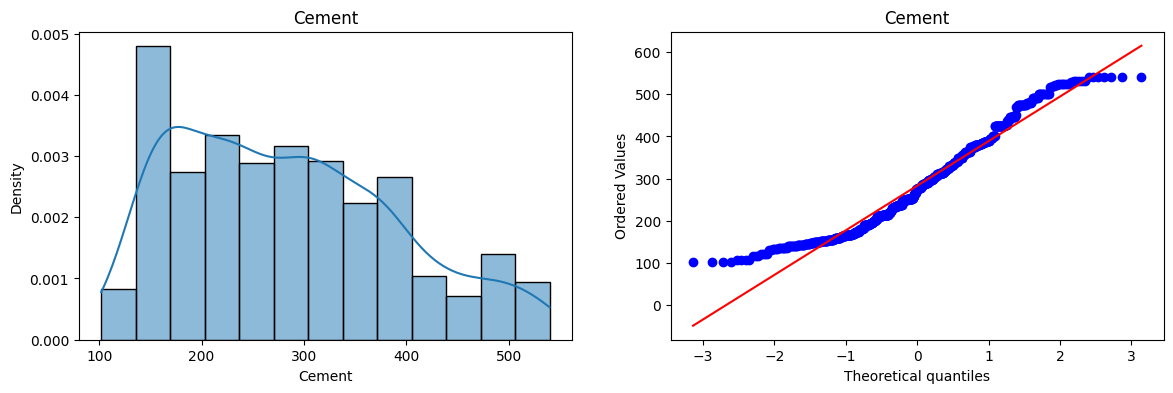

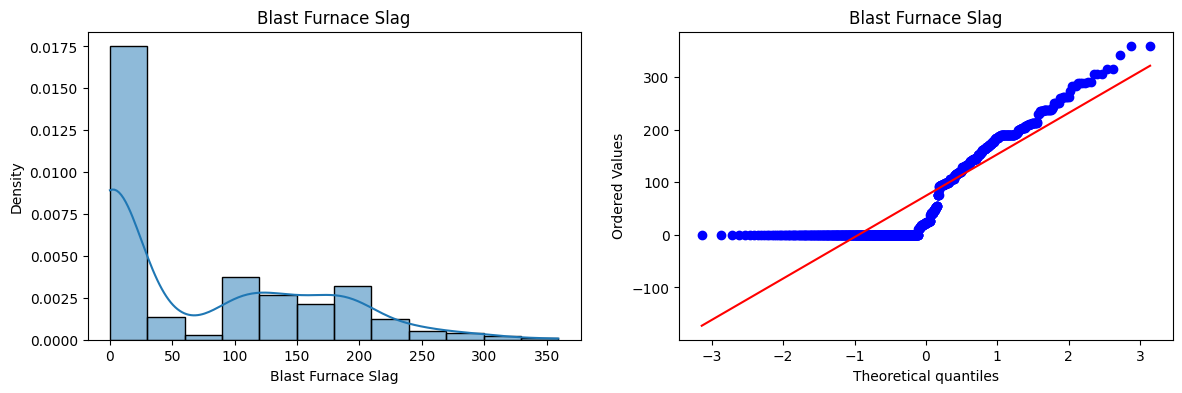

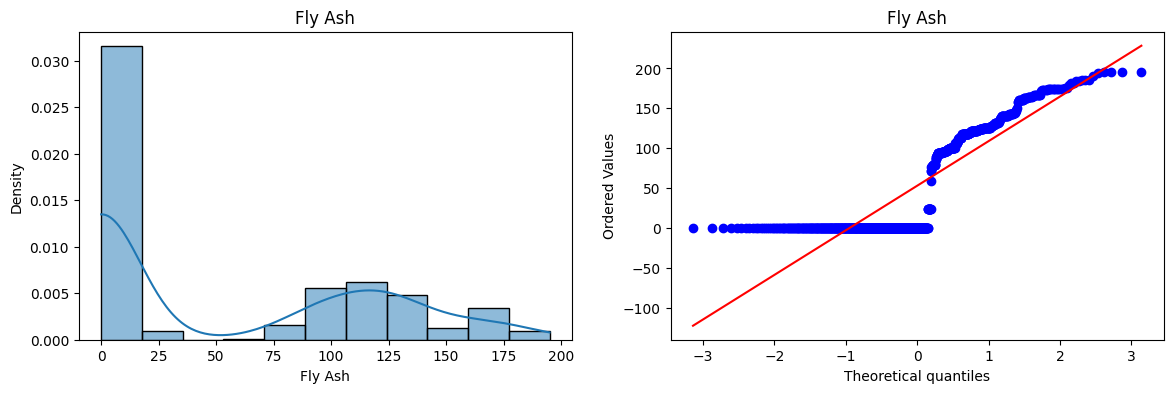

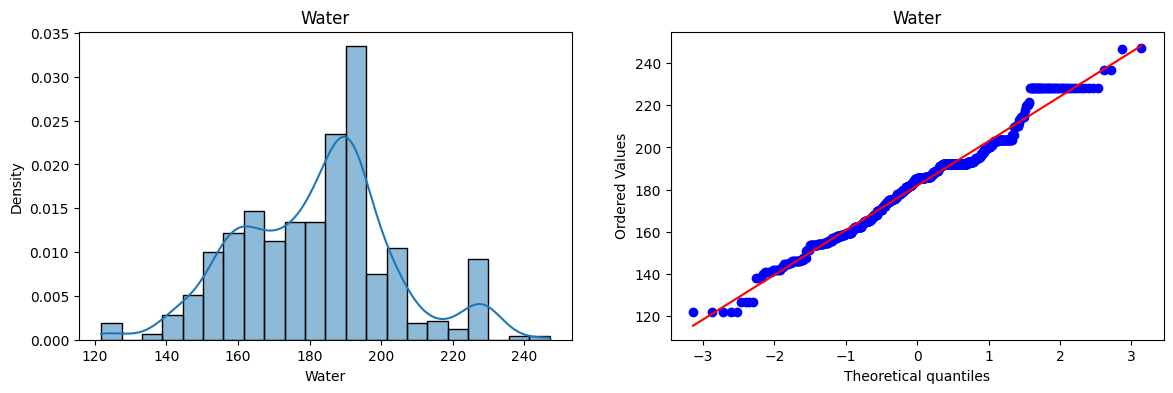

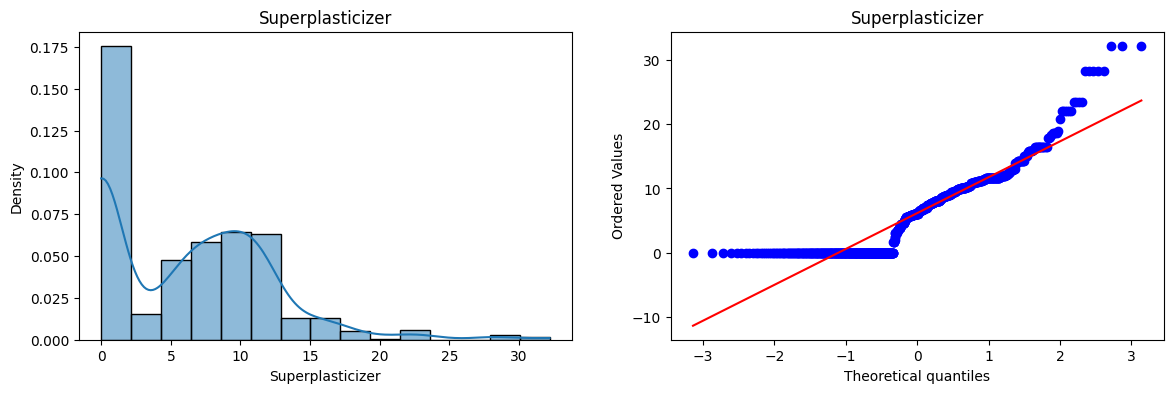

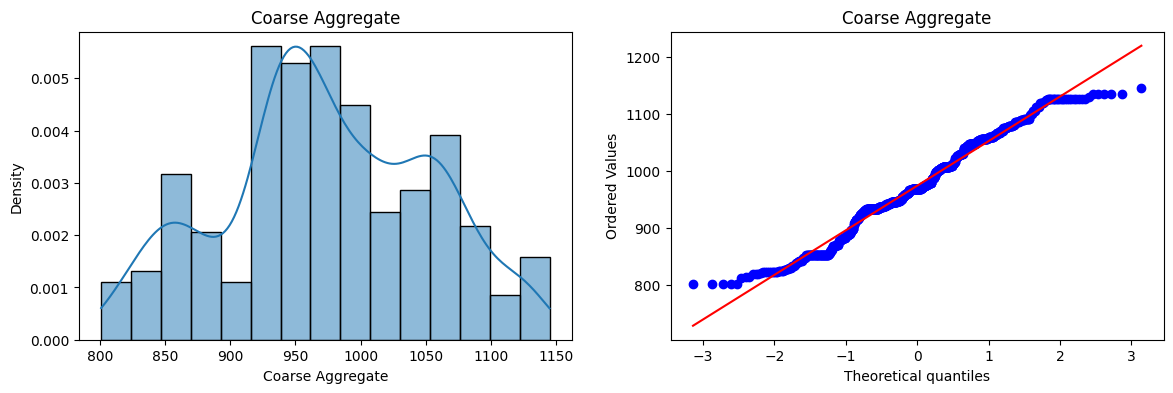

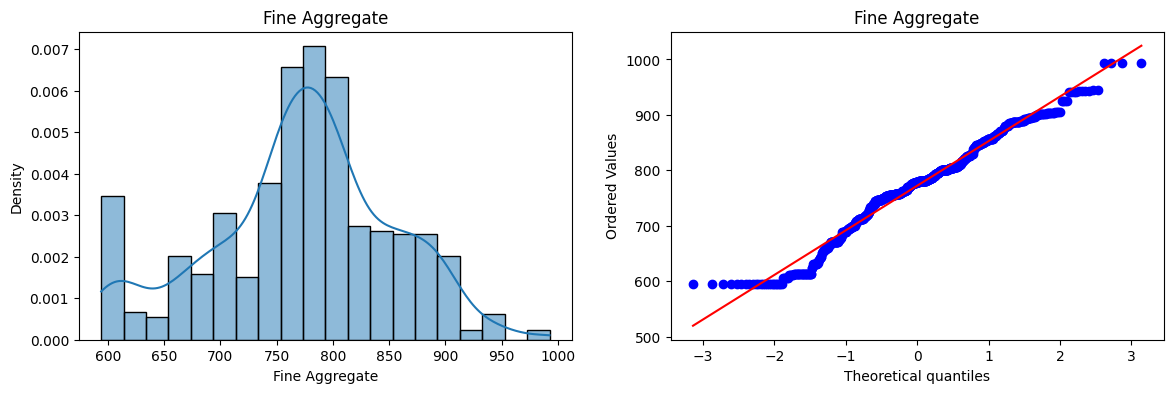

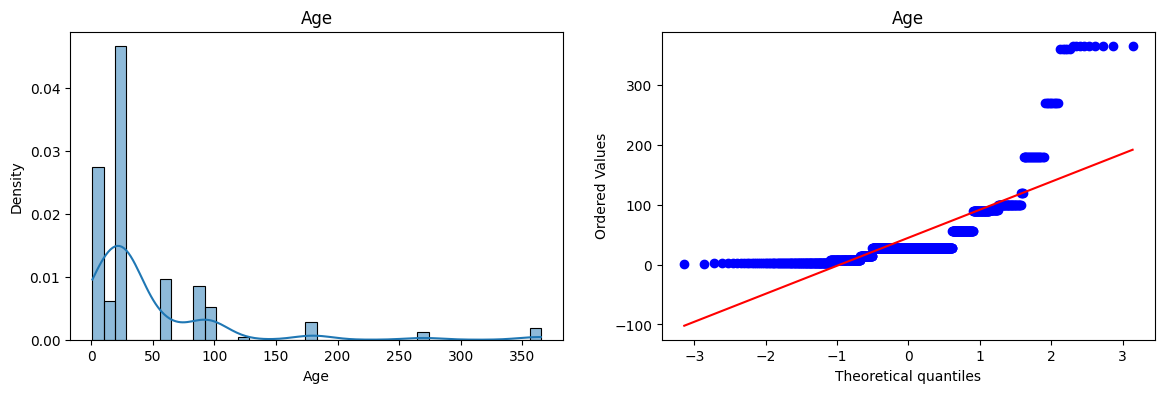

In [19]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat="density")
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

### 2. Box cox transformation

In [20]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001) # since box cox don't work on <=0 values 
X_test_transformed = pt.transform(X_test+0.000001)  # since box cox don't work on <=0 values 

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [21]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825011028632

In [22]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537935430975)

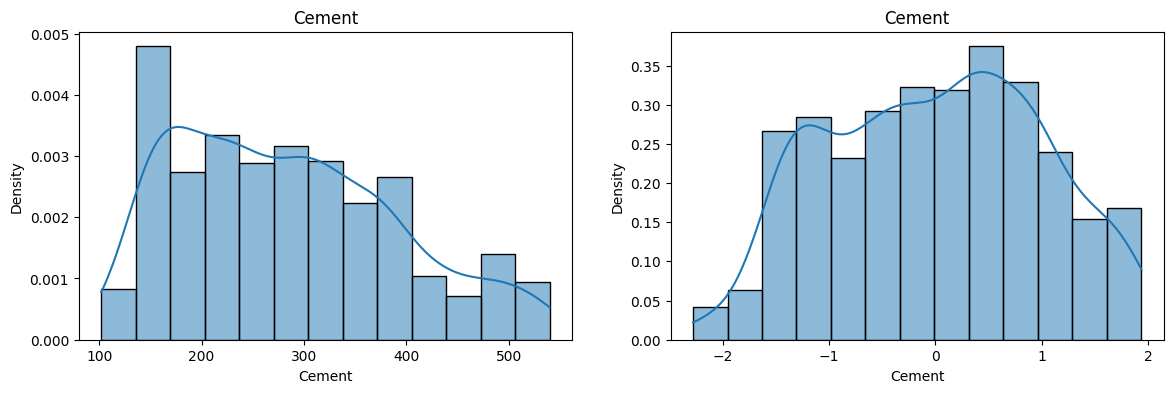

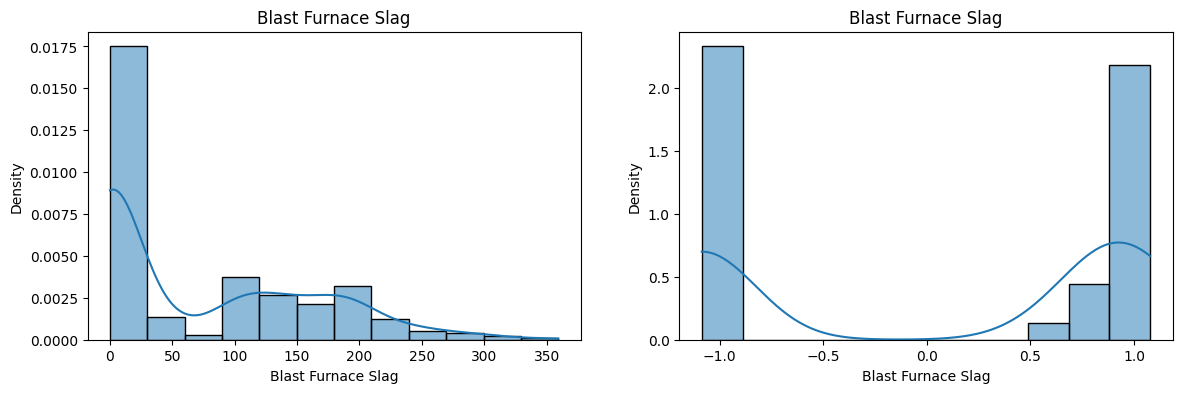

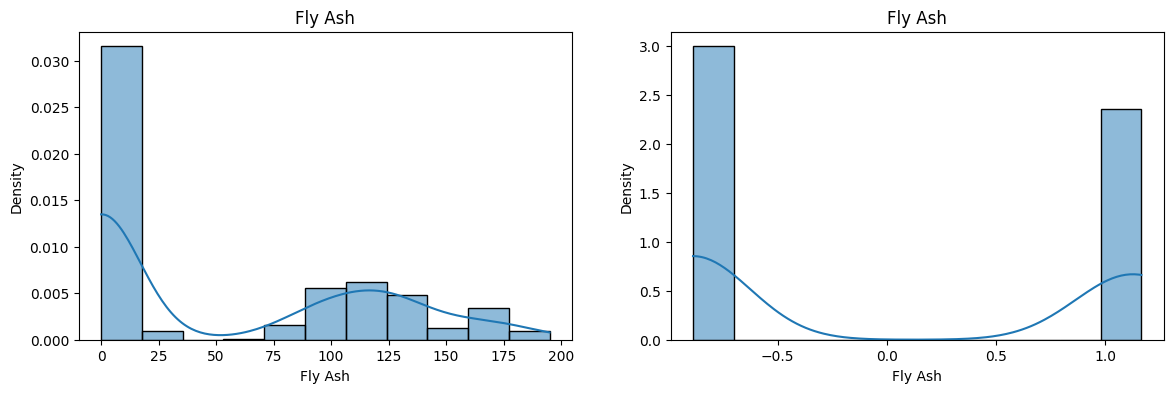

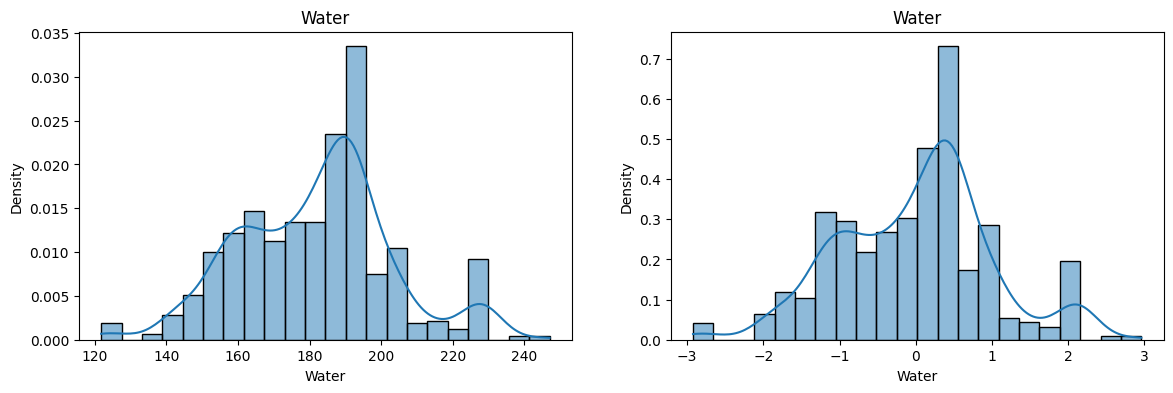

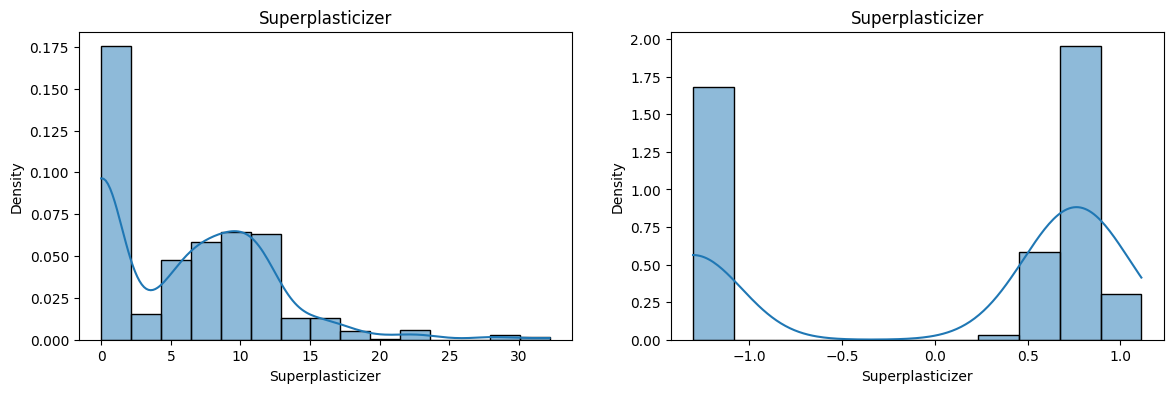

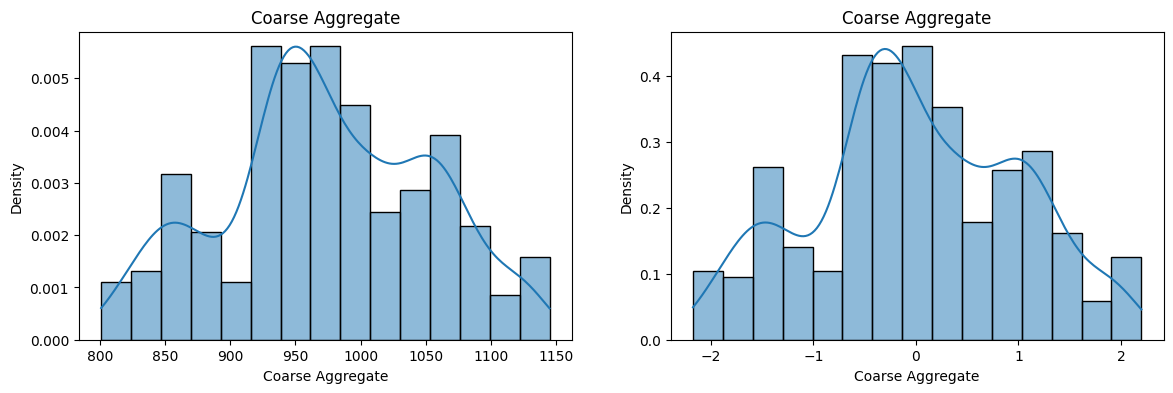

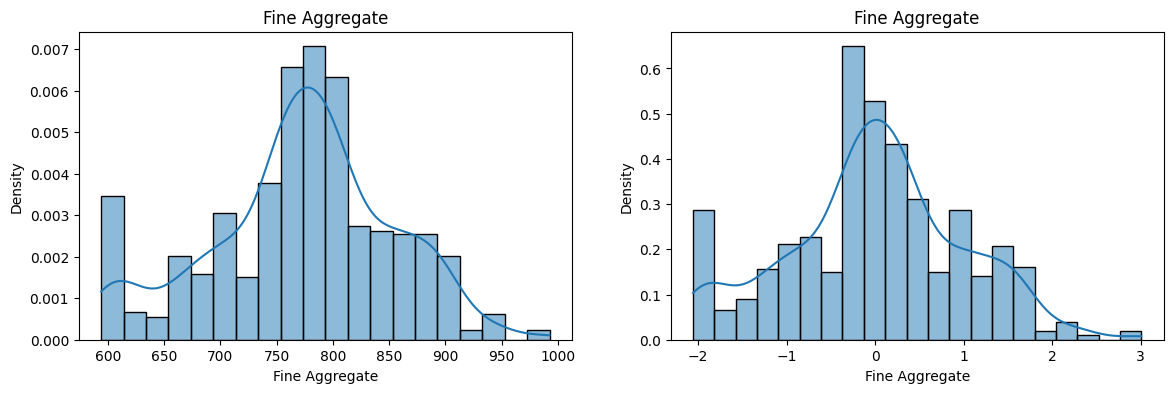

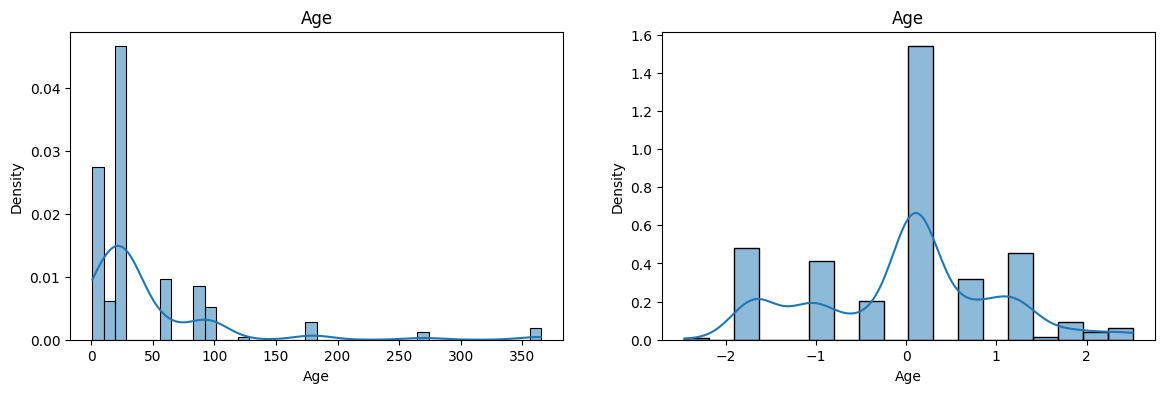

In [25]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat='density')
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True,stat='density')
    plt.title(col)

    plt.show()

### 3. Yeo-Johnson Transformation

In [26]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


0.8161906511066099


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [27]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625126992434)

In [28]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

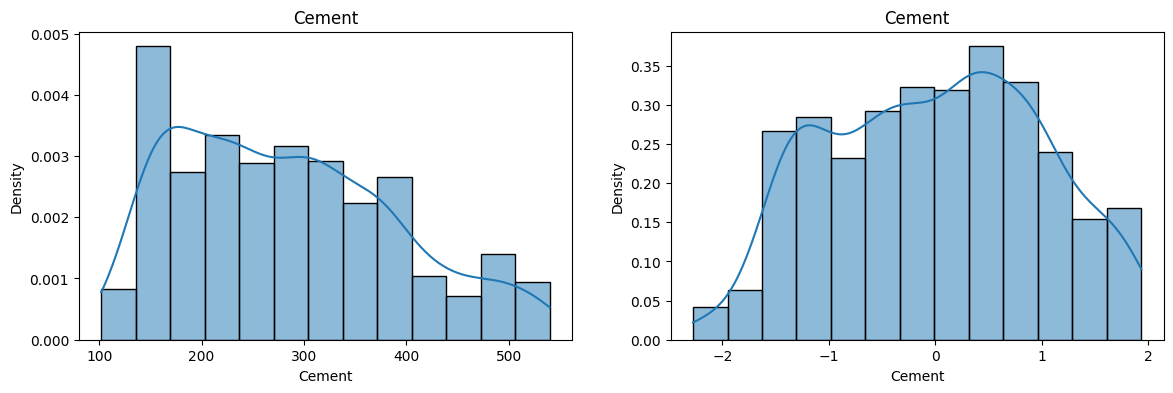

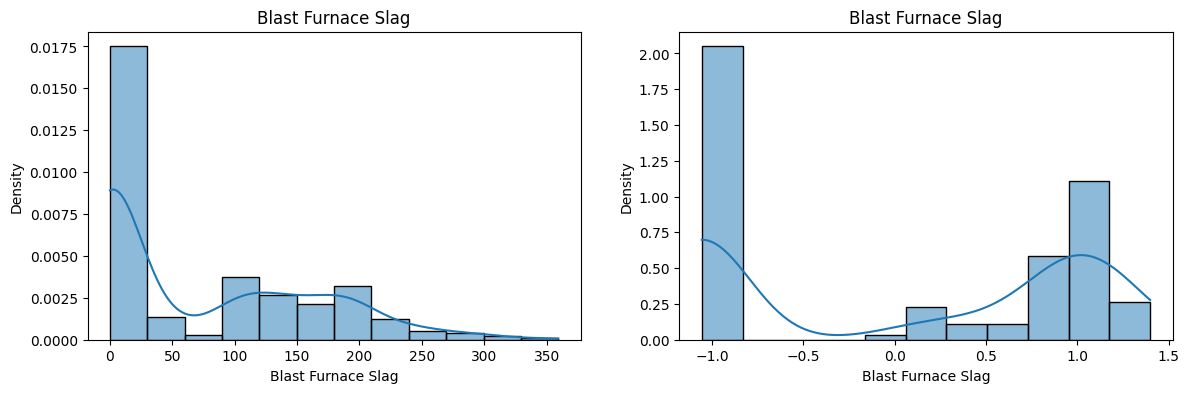

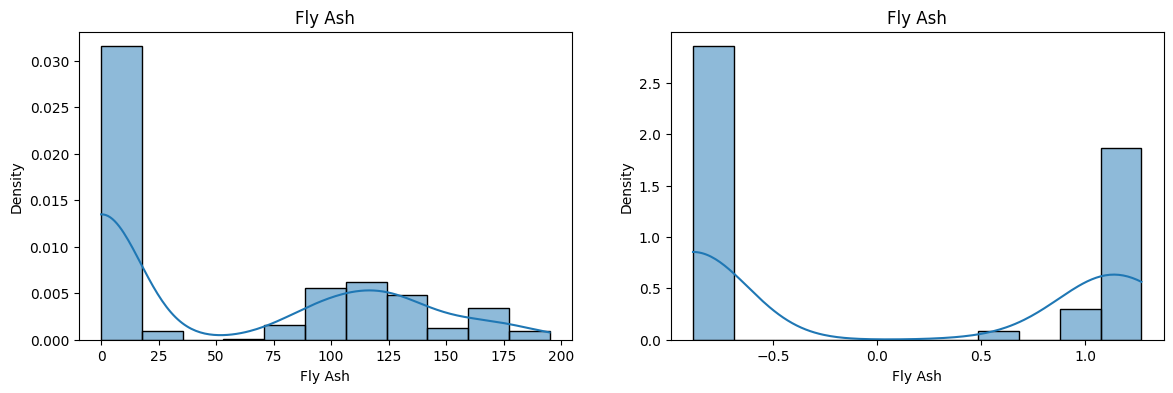

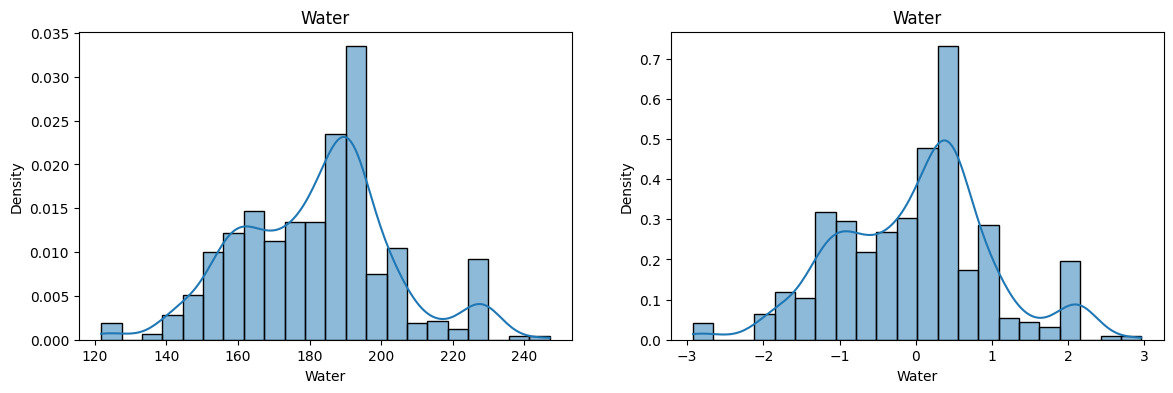

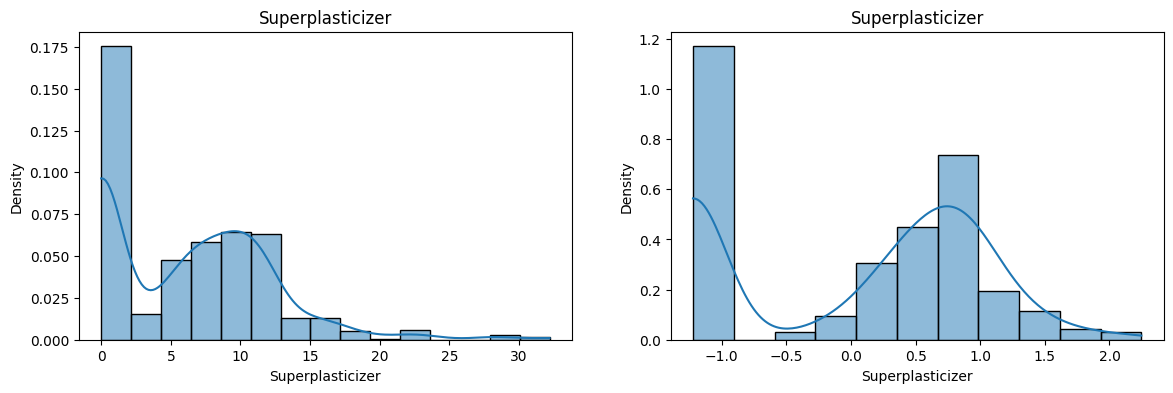

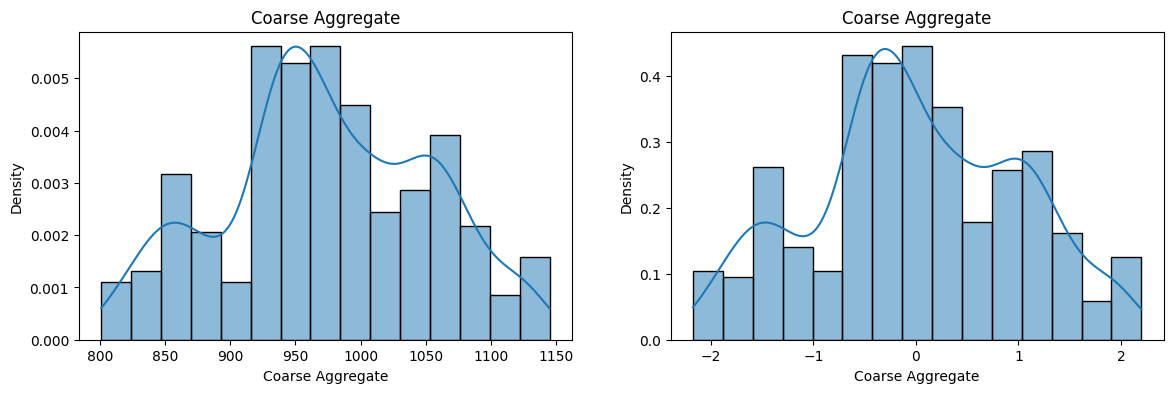

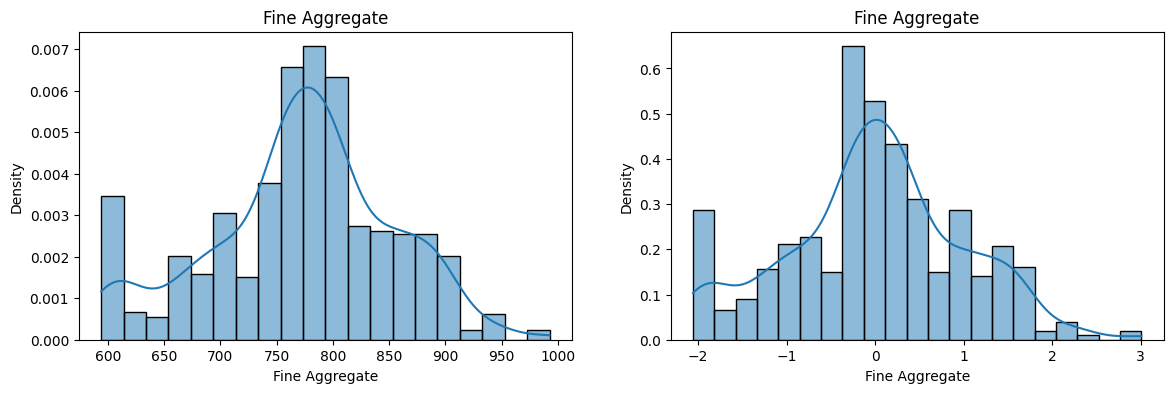

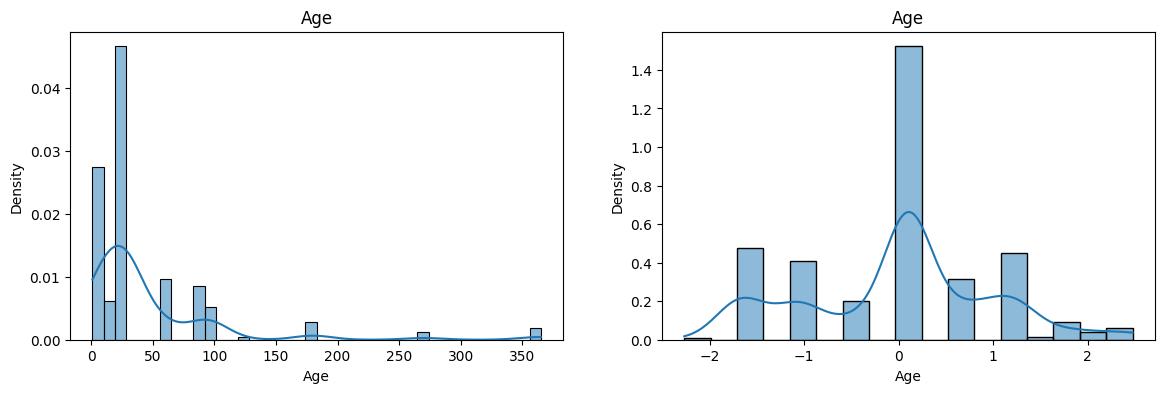

In [30]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat='density')
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True,stat='density')
    plt.title(col)

    plt.show()

In [31]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885


#### Note: (In most cases, yeo-Johnson transformation will perform better but still we should try other transformations they can work for specific data)

# --> Encoding Numerical Features

Feature engineering involves transforming raw data into formats that are better suited for machine learning models. **Encoding numerical features** is one such transformation used to improve model performance and interpretability.


## 1. Discretization (Binning)

Binning, or discretization, refers to converting **continuous numerical features** into **categorical bins or intervals**. This can be useful for reducing the effect of minor observation errors and revealing patterns more clearly.

###  Why Use Binning?
- Reduces the impact of outliers.
- Converts continuous variables into categorical ones for algorithms that perform better with discrete input.
- Improves interpretability.

---

###  Types of Binning

Binning is typically classified into **three categories**:



#### 1.1  Unsupervised Binning

These methods do **not use the target variable** and rely only on the distribution of the feature.

##### 🔹 Equal Width Binning (Uniform Binning)
- Divides the range of the feature into **N equal-sized intervals**.
- Example:
  - Age: 0–100, bins = 5 → `[0–20]`, `[20–40]`, `[40–60]`, `[60–80]`, `[80–100]`

##### 🔹 Equal Frequency Binning (Quantile Binning)
- Ensures **each bin contains an approximately equal number of observations**.
- More robust to skewed distributions.

##### 🔹 K-Means Binning
- Clusters data points using **K-Means clustering** based on feature similarity.
- Cluster centroids form bin centers.

> 🔸 **Note:** These methods ignore the target label and are purely statistical.



#### 1.2  Supervised Binning

These methods use the **target variable** to determine binning in a way that **maximizes predictive power**.

##### 🔹 Decision Tree Binning
- Trains a **decision tree classifier/regressor** using a single feature.
- Tree splits define the bin edges.
- Captures **non-linear** relationships between feature and target.

> ✅ Suitable for boosting algorithms and tree-based models.



#### 1.3  Custom Binning

This involves **manually defining bins** based on **domain expertise** or business logic.

##### 🔹 Examples:
- Age: `[0–18]`, `[19–35]`, `[36–60]`, `[60+]`
- Salary: `Low`, `Medium`, `High`
- Grades: `A`, `B`, `C`, `D`, `F`

> ⚠️ Risk of being subjective but can improve interpretability.



###  Summary Table of Binning

| Binning Type       | Uses Target? | Methods                                  | Pros                                  | Cons                                   |
|--------------------|--------------|------------------------------------------|---------------------------------------|----------------------------------------|
| Unsupervised       | ❌ No         | Equal Width, Equal Frequency, K-Means    | Simple, fast                          | Ignores target, may underperform       |
| Supervised         | ✅ Yes        | Decision Tree Binning                    | Captures feature-target relationship  | More complex, risk of overfitting      |
| Custom             | ⚠️ Not always | Manual Binning                           | Interpretable, domain-aligned         | Can be arbitrary, needs expertise      |

---

##  2. Binarization

Binarization is a process of converting **numerical features** into **binary features** (0 or 1) based on a **threshold**.

###  Why Use Binarization?
- Useful for algorithms that assume **binary input** (e.g., Naive Bayes, logistic regression).
- Captures presence/absence or high/low conditions.



###  How Binarization Works

A threshold `θ` is defined, and the transformation is:

$$
X_{binarized} = 
\begin{cases}
1 & \text{if } X > \theta \\
0 & \text{otherwise}
\end{cases}
$$

### 🔹 Example

Let’s say we binarize a feature called `temperature` with a threshold of 30°C:

| Original | Binarized |
|----------|-----------|
| 28       | 0         |
| 35       | 1         |
| 22       | 0         |
| 31       | 1         |



###  When to Use
- When you want to **emphasize threshold behavior**.
- When features represent **yes/no, on/off, pass/fail** situations.
- For models that perform better with **binary input**.



## ✅ Summary of Encoding Techniques for Numerical Features

| Technique       | Output Type      | Supervision      | Use Case Example                   |
|-----------------|------------------|------------------|------------------------------------|
| Equal Width     | Categorical      | ❌ Unsupervised  | Binning ages evenly                |
| Equal Frequency | Categorical      | ❌ Unsupervised  | Quantile-based financial features  |
| K-Means Binning | Categorical      | ❌ Unsupervised  | Binning based on clusters          |
| Decision Tree   | Categorical      | ✅ Supervised    | Sales amount affecting purchase    |
| Custom Binning  | Categorical      | ⚠️ Manual       | Age or income brackets             |
| Binarization    | Binary (0/1)     | ⚠️ Manual       | Temp > 30 → Hot/Not Hot            |



##  Final Thoughts

- Use **binning** when your numerical feature shows a **non-linear relationship** or requires simplification.
- Use **binarization** when you need to **highlight a specific threshold** or prepare data for **binary-sensitive models**.
- Always validate transformations through **cross-validation** to avoid performance degradation.




## 1. Unsupervised Binning

### Without Binning

In [6]:
df = pd.read_csv('dataset/train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [16]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6359154929577464)

### With Binning

In [30]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile',quantile_method='linear') # strategy cab be 'uniform', 'quantile' or 'kmeans'
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile',quantile_method='linear')

In [31]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [32]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [33]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [35]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [36]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [37]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
651,18.00,2.0,23.0000,8.0,"(16.0, 19.0]","(18.75, 26.0]"
97,23.00,5.0,63.3583,12.0,"(21.0, 23.0]","(51.479, 76.292]"
723,50.00,13.0,13.0000,6.0,"(47.0, 54.0]","(10.5, 13.0]"
871,47.00,13.0,52.5542,12.0,"(42.0, 47.0]","(51.479, 76.292]"
803,0.42,0.0,8.5167,4.0,NaN,"(8.158, 10.5]"


In [38]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [39]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [40]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6303012519561815)

#### Function to give accuracy and plot of didtribution before and after Binning

In [42]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6345266040688575


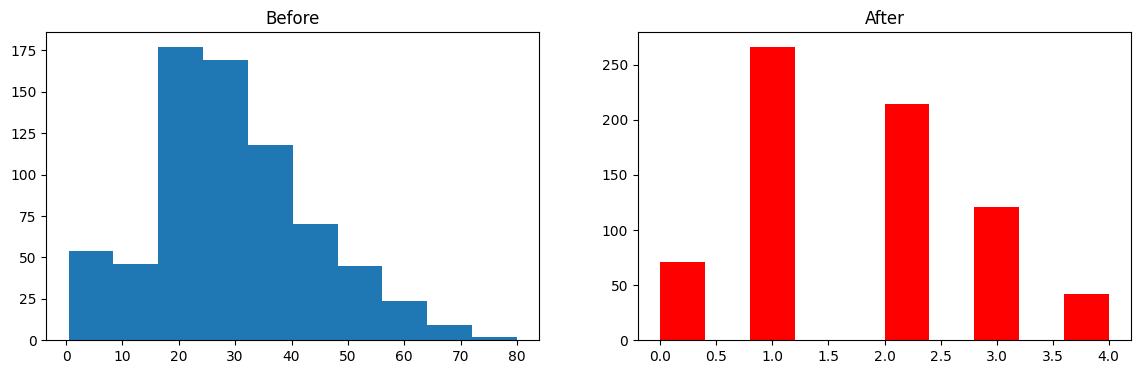

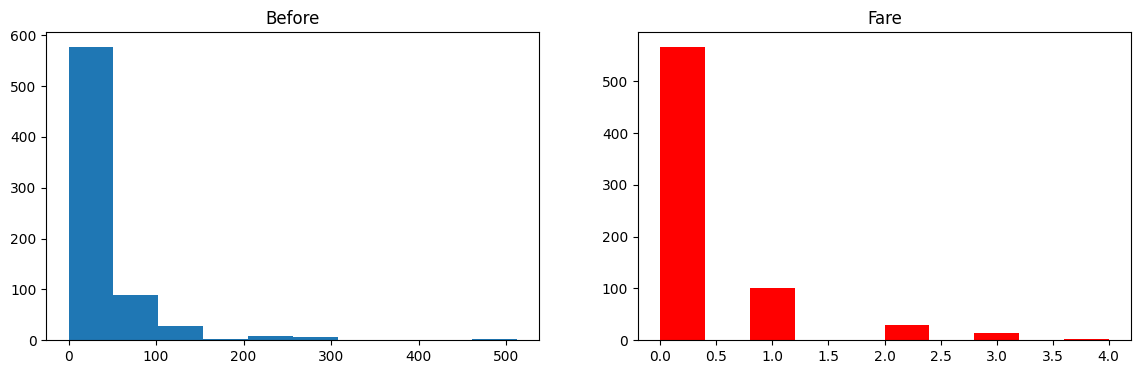

In [43]:
discretize(5,'kmeans')

0.6330594679186228


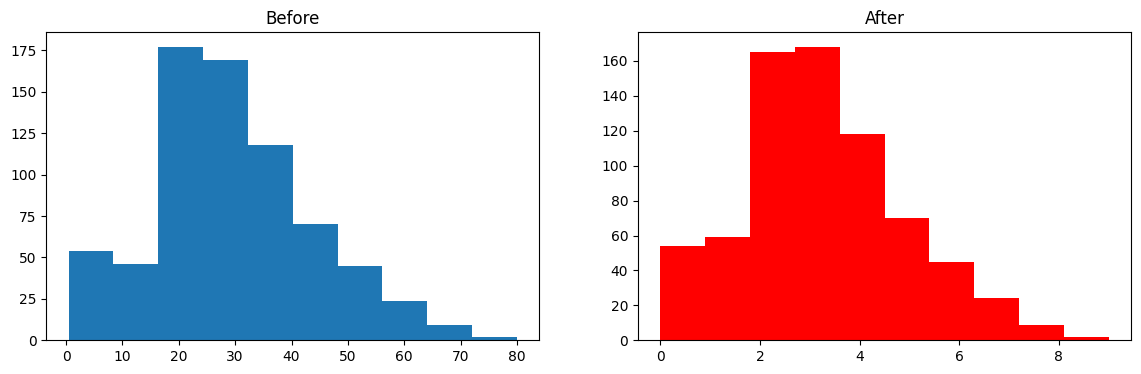

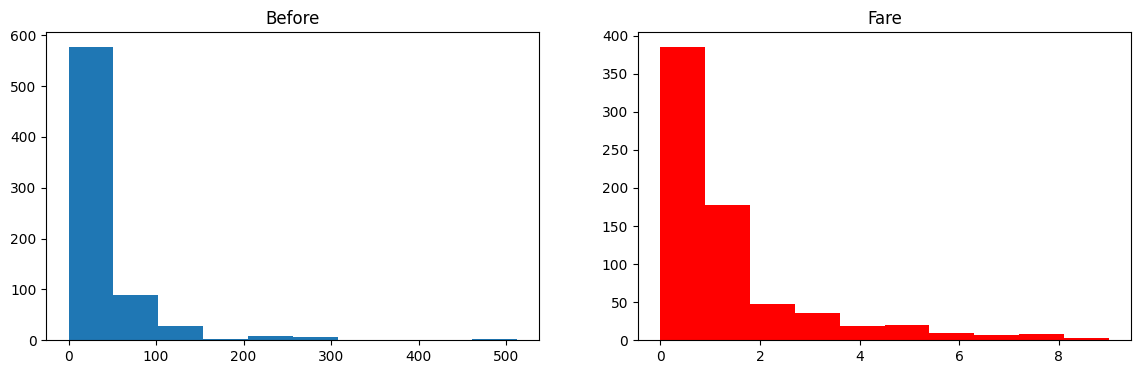

In [44]:
discretize(10,'kmeans')

E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6274647887323944


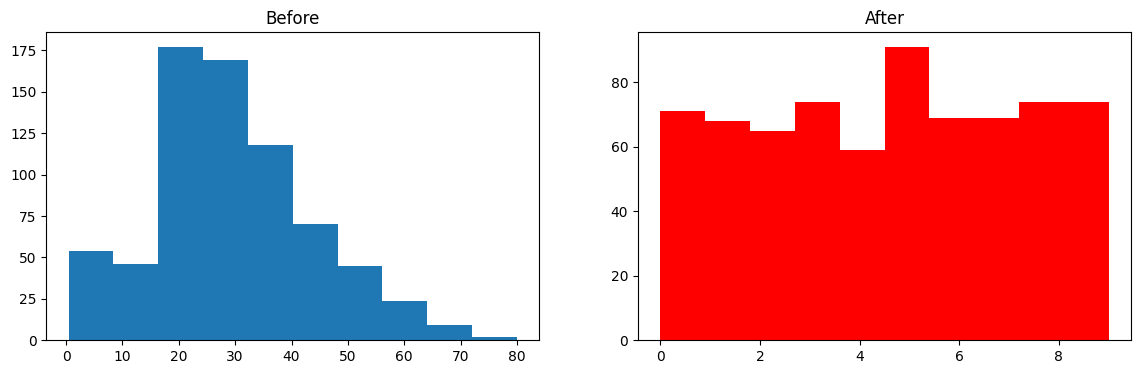

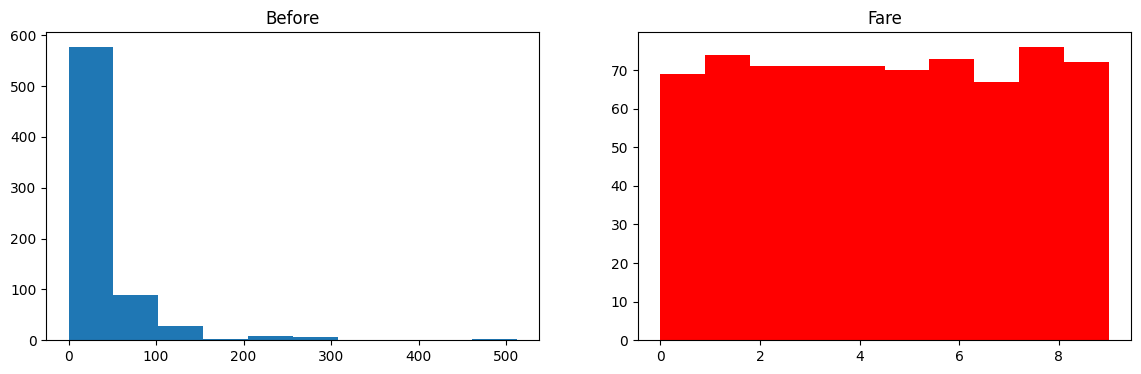

In [45]:
discretize(10,'quantile')

### `KBinsDiscretizer` – Strategy Parameter Explained

| Strategy   | Description                                                                                                      | Best Use Cases                                                                                 | Output Behavior                                                 |
|------------|------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| `uniform`  | Divides the feature range into bins of equal width.                                                             | - When the feature values are uniformly distributed<br>- When bin size consistency is preferred | All bins cover the same range of values                        |
| `quantile` | Bins are created such that each bin contains (approximately) the same number of samples.                       | - When balanced bins are needed<br>- Useful for models sensitive to feature scale distribution  | Each bin has ~equal number of samples (frequencies)            |
| `kmeans`   | Uses 1D k-means clustering to define bins, minimizing within-bin variance.                                      | - When the data has natural clusters<br>- Good for capturing non-linear relationships           | Bins may vary in size and count; based on cluster centroids     |

> 💡 **Note**: In all strategies, the number of bins is controlled via the `n_bins` parameter.



## 2. Binarization

### Without Binarization

In [50]:
df = pd.read_csv('dataset/train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [51]:
df.dropna(inplace=True)

In [52]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [53]:
df['family'] = df['SibSp'] + df['Parch']

In [54]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [55]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [56]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [79]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6363636363636364

In [89]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.651349765258216)

### With Binarization

In [90]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [91]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [92]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [95]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [101]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6276212832550861)

# --> Handling Mixed Variables 

In [4]:
df = pd.read_csv('dataset/titanic.csv')

In [5]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


### Handling Number Column:

In [6]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

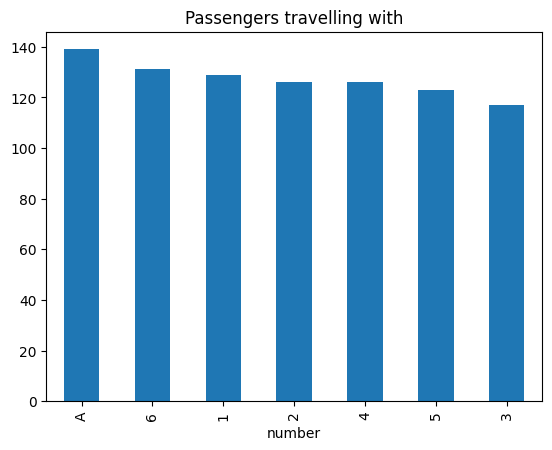

In [7]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [8]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [9]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan) # checking 'number_numerical' column, if null place 'number' column value otherwise nan

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


### Handling Cabin Column:

In [10]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

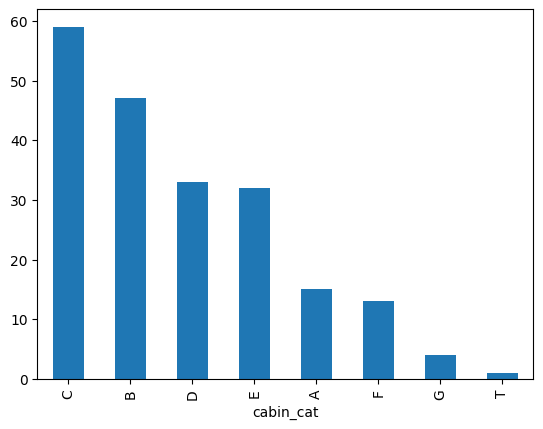

In [12]:
df['cabin_cat'].value_counts().plot(kind='bar')

### Handling Ticket Column:

In [13]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [14]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')


In [15]:
# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [16]:
df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [17]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

# --> Handling Date Time variables:

## 1. Handling Date

In [3]:
date = pd.read_csv('dataset/orders.csv')
time = pd.read_csv('dataset/messages.csv')

In [4]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [5]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [8]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

### Extract Year

In [9]:
# Extract Year
date['date_year'] = date['date'].dt.year
date.sample(5)

,date,product_id,city_id,orders,date_year
920,2019-01-26,6315,22,1,2019
923,2018-11-23,1073,2,1,2018
666,2019-03-19,7429,13,1,2019
867,2019-12-16,335,13,3,2019
248,2019-01-04,3614,29,1,2019


### Extract Month

In [10]:
date['date_month_no'] = date['date'].dt.month
date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [11]:
date['date_month_name'] = date['date'].dt.month_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


### Extract Days

In [12]:
date['date_day'] = date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [13]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek
date.head()


,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6


In [14]:
# day of week - name
date['date_dow_name'] = date['date'].dt.day_name()
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday


In [15]:
# is weekend?
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


### Extract week of the year

In [17]:
date['date_week'] = date['date'].dt.isocalendar().week
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43
3,2019-08-17,2019,8,August,17,5,Saturday,1,33
4,2019-01-06,2019,1,January,6,6,Sunday,1,1


### Extract Quarter

In [19]:
date['quarter'] = date['date'].dt.quarter
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1


### Extract Semester

In [20]:
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1,1


### Extract Time elapsed between dates

In [21]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2025, 8, 11, 13, 50, 9, 735279)

In [22]:
today - date['date']

0     2071 days 13:50:09.735279
1     2553 days 13:50:09.735279
2     2484 days 13:50:09.735279
3     2186 days 13:50:09.735279
4     2409 days 13:50:09.735279
                 ...           
995   2499 days 13:50:09.735279
996   2440 days 13:50:09.735279
997   2288 days 13:50:09.735279
998   2353 days 13:50:09.735279
999   2127 days 13:50:09.735279
Name: date, Length: 1000, dtype: timedelta64[ns]

In [23]:
(today - date['date']).dt.days

0      2071
1      2553
2      2484
3      2186
4      2409
       ... 
995    2499
996    2440
997    2288
998    2353
999    2127
Name: date, Length: 1000, dtype: int64

In [25]:
# Months passed
date['months_passed'] = date['date'].apply(
    lambda d: (today.year - d.year) * 12 + (today.month - d.month)
)

In [27]:
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester,months_passed
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50,4,2,68
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33,3,2,84
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43,4,2,82
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33,3,2,72
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1,1,79


## 2. Handling Time

In [30]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [31]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [32]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [33]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


### Extract Time Part

In [34]:
time['time'] = time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


### Time Difference

In [35]:
today - time['date']

0     4257 days 13:00:09.735279
1     4121 days 14:10:09.735279
2     4607 days 13:29:09.735279
3     3909 days 13:19:09.735279
4     4306 days 14:39:09.735279
                 ...           
995   4896 days 13:00:09.735279
996   4217 days 14:36:09.735279
997   4682 days 14:13:09.735279
998   4798 days 14:16:09.735279
999   4070 days 14:25:09.735279
Name: date, Length: 1000, dtype: timedelta64[ns]

In [36]:
# in seconds
(today - time['date'])/np.timedelta64(1,'s')

0      3.678516e+08
1      3.561054e+08
2      3.980933e+08
3      3.377855e+08
4      3.720911e+08
           ...     
995    4.230612e+08
996    3.644014e+08
997    4.045760e+08
998    4.145986e+08
999    3.516999e+08
Name: date, Length: 1000, dtype: float64

In [37]:
# in minutes
(today - time['date'])/np.timedelta64(1,'m')

0      6.130860e+06
1      5.935090e+06
2      6.634889e+06
3      5.629759e+06
4      6.201519e+06
           ...     
995    7.051020e+06
996    6.073356e+06
997    6.742933e+06
998    6.909976e+06
999    5.861665e+06
Name: date, Length: 1000, dtype: float64

In [38]:
# in hours
(today - time['date'])/np.timedelta64(1,'h')

0      102181.002704
1       98918.169371
2      110581.486038
3       93829.319371
4      103358.652704
           ...      
995    117517.002704
996    101222.602704
997    112382.219371
998    115166.269371
999     97694.419371
Name: date, Length: 1000, dtype: float64

# Handling Missing Data in Machine Learning

Missing data is a common problem in real-world datasets. It can occur due to human errors, equipment malfunctions, skipped survey questions, or other reasons. Handling missing values properly is crucial because they can lead to biased estimates, reduced statistical power, and inaccurate model predictions.

---

## 1. **Types of Missing Data**

Before deciding how to handle missing values, it’s important to understand their type:

1. **MCAR (Missing Completely At Random)**  
   The probability of missingness is unrelated to any variable in the dataset.  
   Example: Sensor randomly fails to record a value.

2. **MAR (Missing At Random)**  
   The probability of missingness is related to observed variables but not the missing variable itself.  
   Example: Older patients are less likely to answer income-related questions, but within each age group, missingness is random.

3. **MNAR (Missing Not At Random)**  
   The probability of missingness is related to the unobserved value itself.  
   Example: People with very high incomes are more likely to refuse disclosing their income.

---

## 2. **Techniques for Handling Missing Data**

### A. **Deletion Methods**

1. **Listwise Deletion** (Complete Case Analysis)  
   - **Description:** Remove rows with missing values in any variable.  
   - **Pros:** Simple, no imputation bias.  
   - **Cons:** Can lead to large data loss if missingness is common; not suitable for MNAR data.

2. **Pairwise Deletion**  
   - **Description:** Uses all available data for each analysis without removing entire rows.  
   - **Pros:** Retains more data than listwise deletion.  
   - **Cons:** Different analyses use different datasets → inconsistent results.

---

### B. **Imputation Methods**

1. **Mean/Median/Mode Imputation**  
   - Replace missing numeric values with mean/median, categorical with mode.
   - **Pros:** Simple, fast.  
   - **Cons:** Underestimates variance; changes feature correlation; bring outliers; changes distribution.

2. **Constant Value Imputation**  
   - Replace missing values with a fixed number (e.g., `0`, `Unknown`).  
   - **Pros:** Preserves dataset size; clear marker for missing data.  
   - **Cons:** May introduce artificial patterns.

3. **Forward Fill / Backward Fill (Time Series)**  
   - Fill missing values with the previous or next value.  
   - **Pros:** Preserves trends; useful in time series.  
   - **Cons:** Not suitable for non-sequential data.

4. **K-Nearest Neighbors (KNN) Imputation**  
   - Fill missing values based on the values of the nearest neighbors.  
   - **Pros:** Preserves feature correlations.  
   - **Cons:** Computationally expensive on large datasets.

5. **Regression Imputation**  
   - Predict missing values using regression models based on other features.  
   - **Pros:** Utilizes relationships between variables.  
   - **Cons:** Can overfit; underestimates uncertainty.

6. **Multiple Imputation**  
   - Generates several possible datasets by filling missing values multiple times, analyzes each, and combines results.  
   - **Pros:** Accounts for uncertainty in missing data.  
   - **Cons:** More complex and computationally expensive.

7. **Iterative Imputer (MICE)**  
   - Uses multiple regression models in an iterative process to impute missing values.  
   - **Pros:** Handles complex relationships.  
   - **Cons:** Can be slow for large datasets.

---

### C. **Model-Based Handling**

1. **Tree-Based Algorithms Handling Missing Data**  
   - Some models like **XGBoost**, **LightGBM**, and **CatBoost** can handle missing values internally.  
   - **Pros:** No manual imputation needed.  
   - **Cons:** Method is model-specific.

---

## 3. **Best Practices**

- **Understand Missingness Type:** Use statistical tests or patterns to identify MCAR, MAR, or MNAR.
- **Visualize Missing Data:** Libraries like `missingno` in Python can help.
- **Avoid Blind Imputation:** Always consider feature relationships and model impact.
- **Try Multiple Techniques:** Evaluate model performance after each method.
- **Document Your Process:** Ensure reproducibility for analysis.

---

## 4. **Summary Table**

| Technique                  | Pros                                    | Cons                                     | Best For |
|----------------------------|-----------------------------------------|-------------------------------------------|----------|
| Listwise Deletion          | Simple, no bias from imputation         | Data loss                                 | MCAR     |
| Pairwise Deletion          | More data than listwise                 | Inconsistent datasets                     | MCAR     |
| Mean/Median/Mode           | Simple, fast                            | Underestimates variance                   | MCAR     |
| Constant Value             | Preserves size, easy                    | Artificial patterns                       | Any      |
| Forward/Backward Fill      | Preserves trends                        | May distort patterns                      | Time Series |
| KNN Imputation             | Preserves correlations                  | Slow, memory heavy                        | MAR      |
| Regression Imputation      | Uses relationships                      | Overfitting risk                          | MAR      |
| Multiple Imputation        | Accounts for uncertainty                | Complex                                   | MAR/MNAR |
| Iterative Imputer (MICE)   | Handles complex patterns                | Computationally expensive                 | MAR      |
| Tree-Based Handling        | No preprocessing needed                 | Model-specific                            | Any      |

---


## --> List wise Deletion

In [3]:
df = pd.read_csv('dataset/data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
# percentage of null values
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [7]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18,0.624,no_enrollment,Graduate,7.0,23.0
18845,0.624,no_enrollment,NaN,12.0,134.0
7260,0.920,no_enrollment,Phd,20.0,43.0
16560,0.910,no_enrollment,High School,7.0,104.0
14039,0.740,no_enrollment,Graduate,15.0,77.0


In [9]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [14]:
# percentage of data remains after removing missing values
(len(df[cols].dropna()) / len(df))*100

89.68577095730244

In [15]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

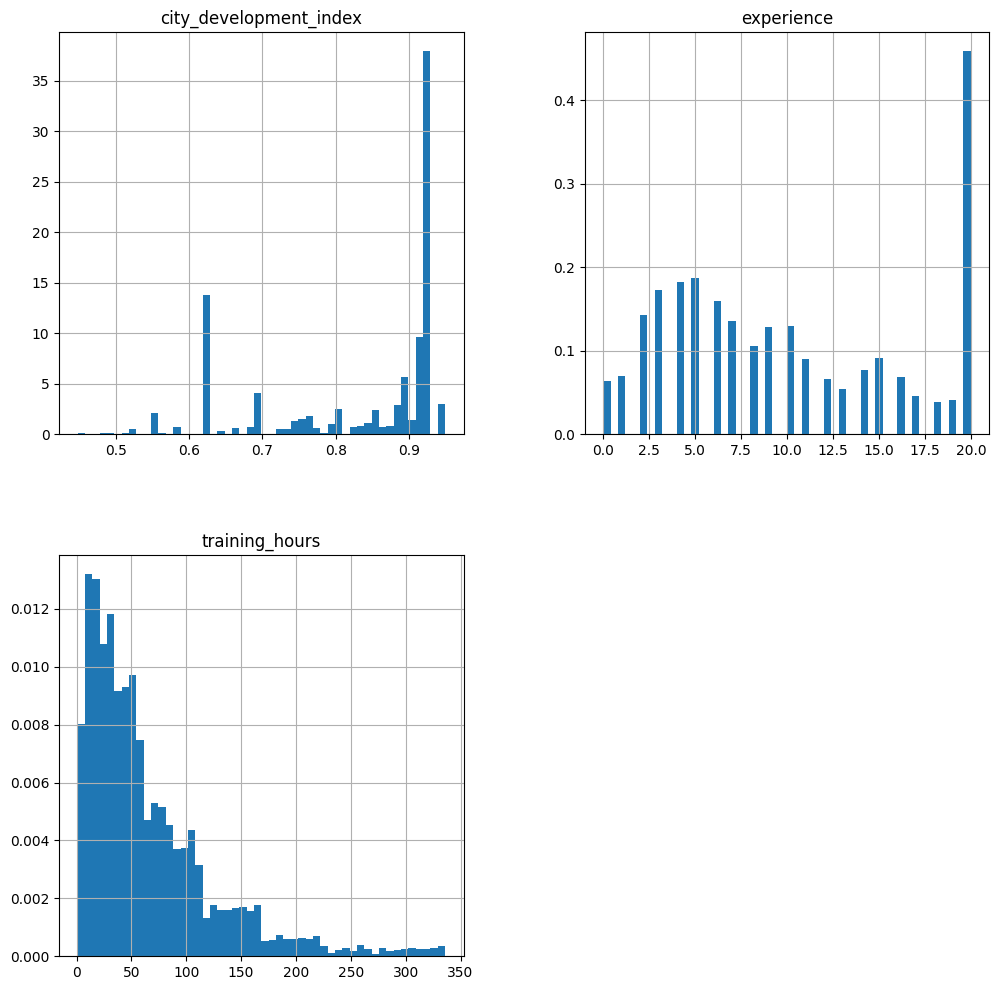

In [16]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

### Graphs to plot the before and after distribution

<Axes: >

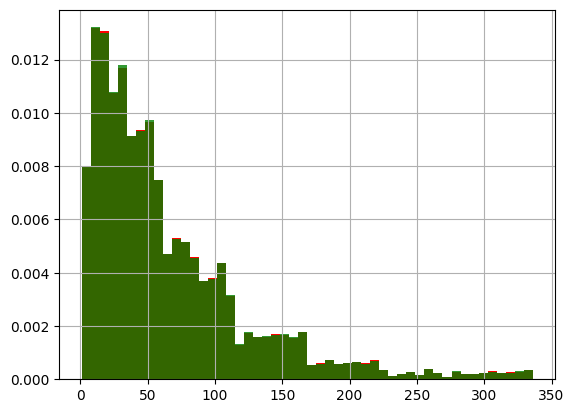

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

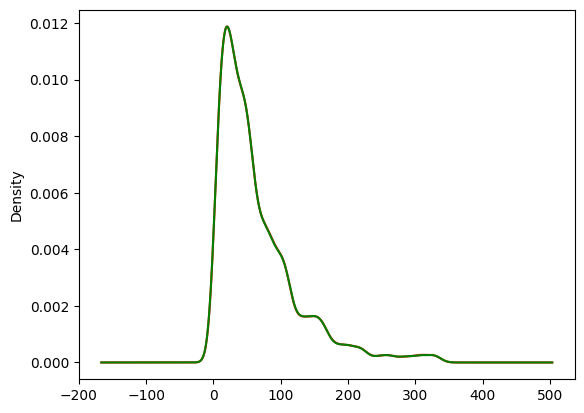

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

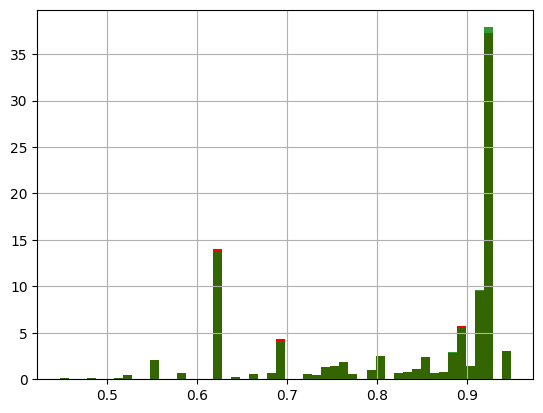

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

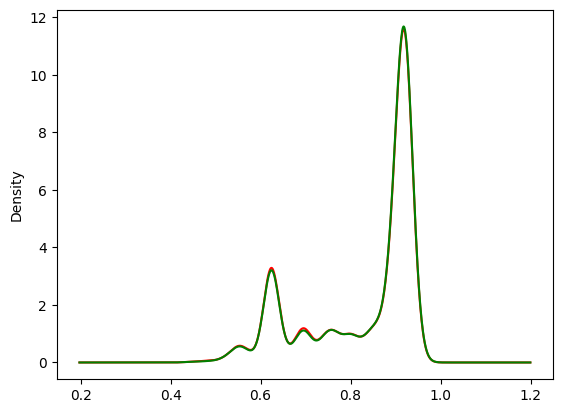

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

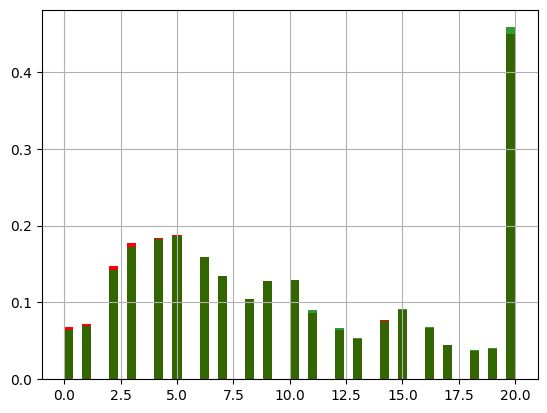

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

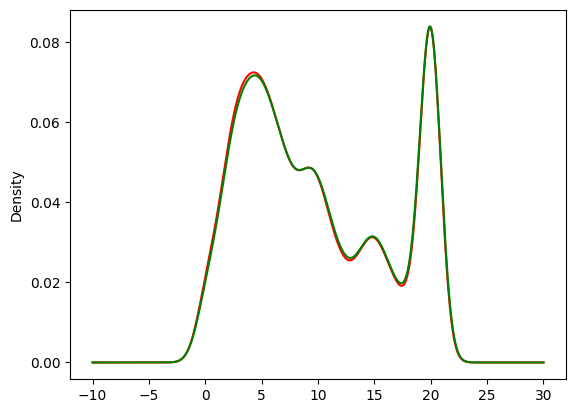

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

### Percentaage of columns before and after removal

In [28]:
temp = pd.concat([
            # percentage of observations per category, original data
            (df['enrolled_university'].value_counts() / len(df))*100,

            # percentage of observations per category, cca data
            (new_df['enrolled_university'].value_counts() / len(new_df))*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [27]:
temp = pd.concat([
            # percentage of observations per category, original data
            (df['education_level'].value_counts() / len(df))*100,

            # percentage of observations per category, cca data
            (new_df['education_level'].value_counts() / len(new_df))*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713


### Note: If the difference bw both percentages is much greater then we should not use this technique and also this technique is not widely used as it removes the data

# --> Numerical Imputation

## 1. Mean Median Imputation

#### With Pandas

In [4]:
df = pd.read_csv('dataset/titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [13]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
180,NaN,69.5500,10,28.75,29.785904,69.5500,69.5500
103,33.0,8.6542,0,33.00,33.000000,8.6542,8.6542
87,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500
215,31.0,113.2750,1,31.00,31.000000,113.2750,113.2750
9,14.0,30.0708,1,14.00,14.000000,30.0708,30.0708


In [15]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


### Note: If difference of variance is much greater then do not use this method on that column.

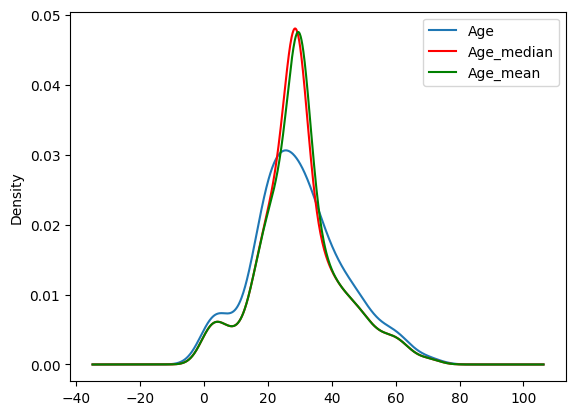

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

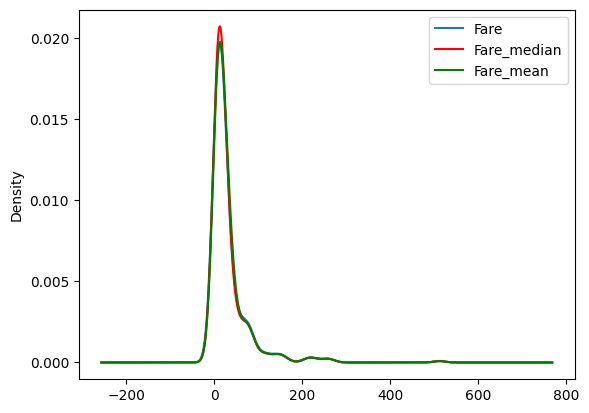

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [19]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

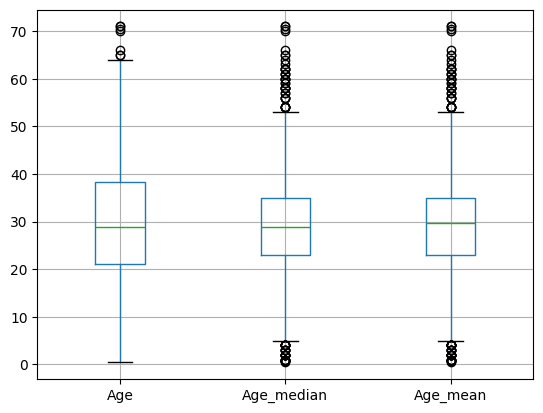

In [20]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

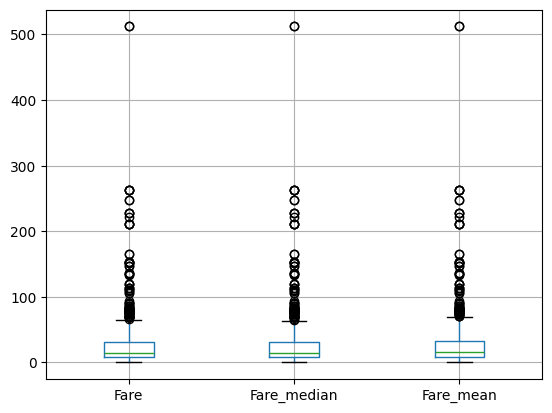

In [21]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Note: If outliers become more than before like in "Age" then don't use this method.

### Using Sklearn:

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [25]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [26]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [28]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [29]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## 2. Constant Value Imputation

Constant Value Imputation is a technique where all missing values are replaced with a **fixed constant** (e.g., `-1` or `99`) that does **not** normally occur in the dataset.  
This helps to:

- Preserve the dataset size
- Clearly mark missing values
- Avoid errors in numerical computations

Using Pandas:
```python
df.fillna(-1, inplace=True)
```
Using scikit-learn:
```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-1)
df_imputed = imputer.fit_transform(df)
```
Just like we did above, just change parameters

## 3. End of Distribution Imputation

End of Distribution Imputation replaces missing values with **extreme values** from the tail of the distribution.  
Common approaches:
- **High extreme:** mean + 3 × standard deviation  
- **Low extreme:** mean − 3 × standard deviation  

✅ **Why use it?**
- Preserves dataset size  
- Keeps imputed values easily distinguishable  
- Works well when data naturally contains outliers  

---

### **Python Example**
```python
import pandas as pd
from sklearn.impute import SimpleImputer

# Example DataFrame
df = pd.DataFrame({'col': [1, 2, 3, None, 5, None]})

# Calculate extremes
high_extreme = df['col'].mean() + 3 * df['col'].std()
low_extreme  = df['col'].mean() - 3 * df['col'].std()

# Pandas - High extreme
df['col_high'] = df['col'].fillna(high_extreme)

# Pandas - Low extreme
df['col_low'] = df['col'].fillna(low_extreme)

# Scikit-learn - High extreme
imputer_high = SimpleImputer(strategy='constant', fill_value=high_extreme)
df['col_high_sklearn'] = imputer_high.fit_transform(df[['col']])

# Scikit-learn - Low extreme
imputer_low = SimpleImputer(strategy='constant', fill_value=low_extreme)
df['col_low_sklearn'] = imputer_low.fit_transform(df[['col']])

print(df)


# --> Categorical Imputation

## 1. Most Frequent Value imputation (Mode)

In [3]:
df = pd.read_csv('dataset/house_price.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

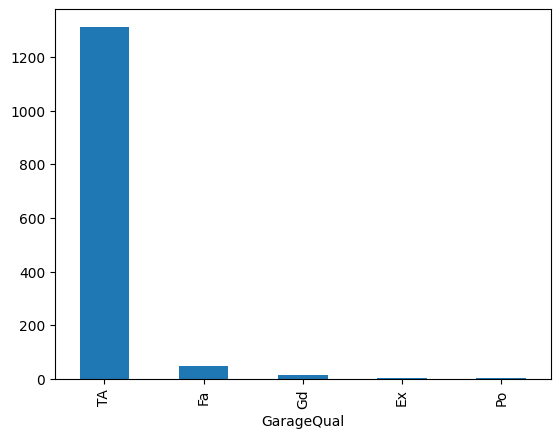

In [12]:
df['GarageQual'].value_counts().plot(kind='bar')

In [13]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

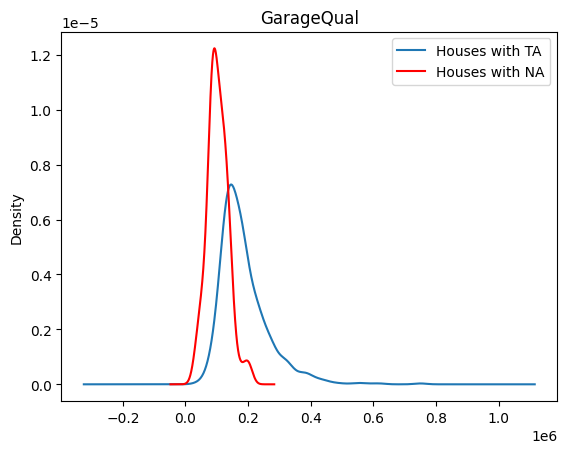

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

### Note: You can check the difference bw most common value and missing values if after replacing missing values with most common values the distribution changes to same for both then this method this good for this column.

In [15]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [16]:
df['GarageQual'].fillna('TA', inplace=True)

C:\Users\ASCC\AppData\Local\Temp\ipykernel_6632\1818999247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

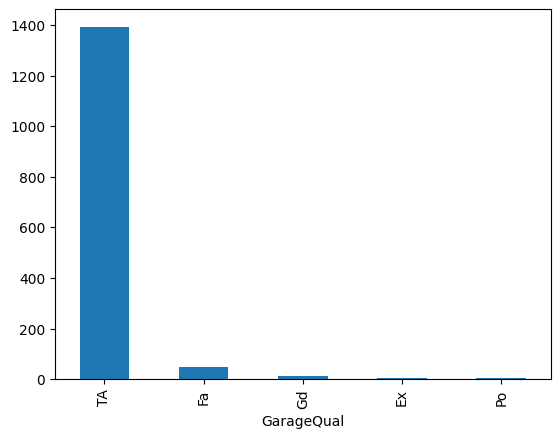

In [17]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

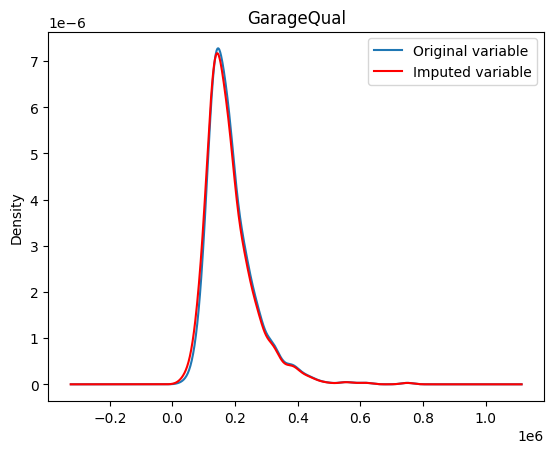

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

### Note: After imputation, we can check that both distributions are same that means this method is right.

**Factors:**
- Data should be MCAR
- Mode value should be much repeated than other values in comparison. There should be huge difference between the occurance of mode value and other values.
- Data should be missing `<=5%`

<Axes: xlabel='FireplaceQu'>

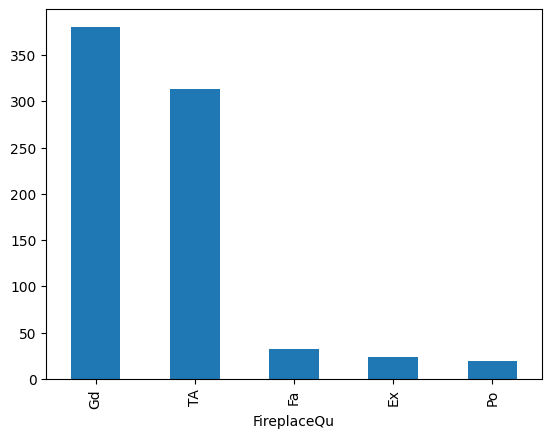

In [20]:
# Using this technique on different column
df['FireplaceQu'].value_counts().plot(kind='bar')

In [21]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

#### Mode 'Gd' isn't much higher than other value 'TA' and also missing values are 47%

Text(0.5, 1.0, 'FireplaceQu')

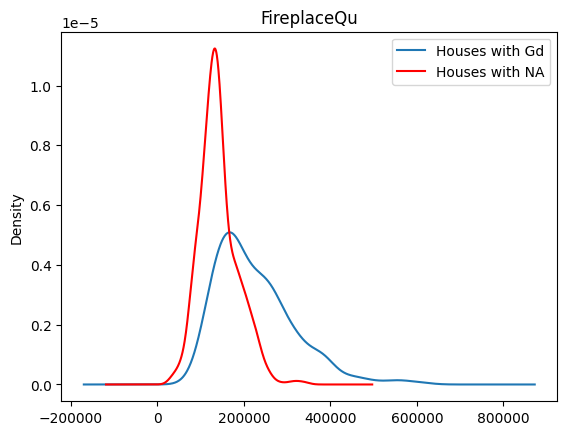

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [23]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [24]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\ASCC\AppData\Local\Temp\ipykernel_6632\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

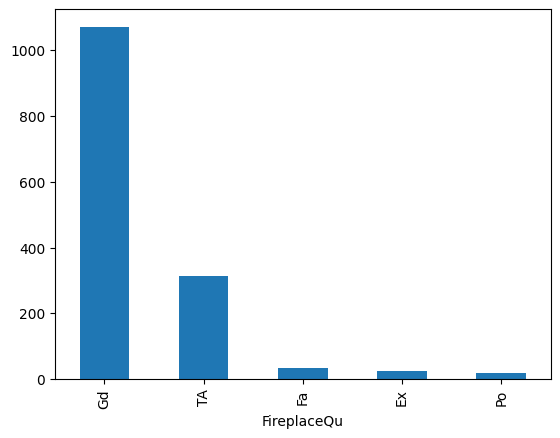

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

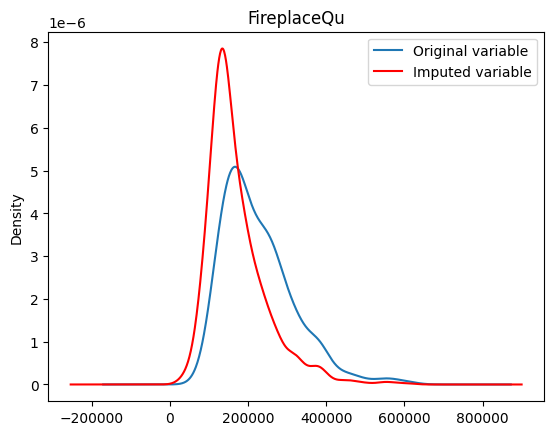

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

### Distribution before and after are different so this method isn't for this column we should use missing category.

### Sklearn

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [28]:
imputer = SimpleImputer(strategy='most_frequent')

In [29]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [30]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

## 2. Missing Category Imputation
This technique is same as arbitrary or constant value imputation that we did for numerical values

In [31]:
df = pd.read_csv('dataset/house_price.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [32]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

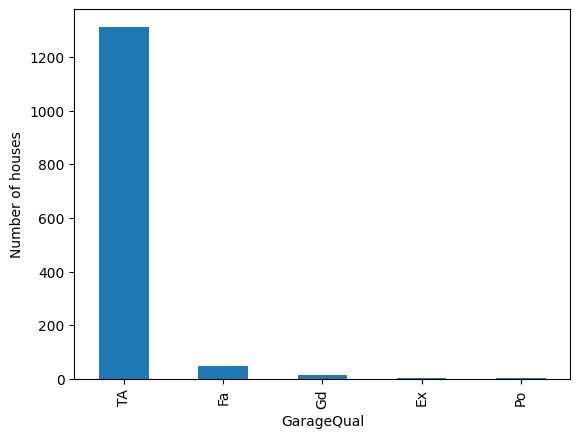

In [34]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [35]:
df['GarageQual'].fillna('Missing', inplace=True)

C:\Users\ASCC\AppData\Local\Temp\ipykernel_6632\4101878677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

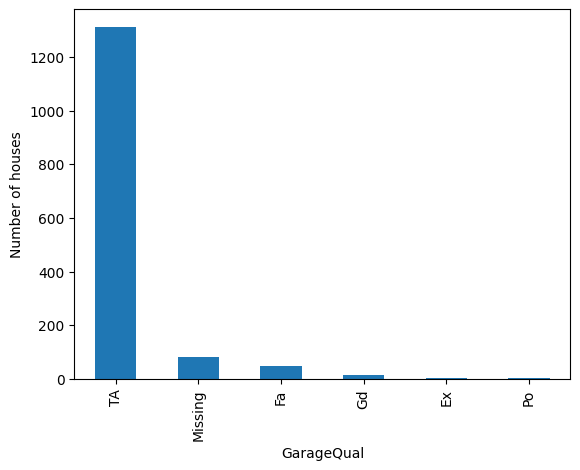

In [36]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [37]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [38]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [39]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

E:\Abdullah\Code\jupyter lab\titanic\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [40]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)